In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 1. Load the data from Level 2
df = pd.read_csv('../data/processed/mmm_feature_engineered.csv')
df['Date'] = pd.to_datetime(df['Date'])

# 2. Engineer a simple 'Seasonality' Feature
# In Level 1, we used a sine wave. Here, we'll just use the Week Number (1-52).
# This helps the model understand "It's December, sales are naturally high."
df['Week'] = df['Date'].dt.isocalendar().week

# 3. Define Features (X) and Target (y)
features = ['TV_Adstock', 'Social_Adstock', 'Radio_Adstock', 'Week']
target = 'Sales'

X = df[features]
y = df[target]

# 4. Split into Train and Test (80% Train, 20% Test)
# We assume the future resembles the past (Random Split)
# Note: In strict Time Series, we would split by Date (First 2 years vs Last year), 
# but for a basic MMM, random split is acceptable to capture the relationships.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data ready for training.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Data ready for training.
Training samples: 124
Testing samples: 32


In [2]:
# 5. Initialize and Train the Model
# Alpha is the "Penalty" term. Higher alpha = simpler model (less overfitting).
model = Ridge(alpha=1.0) 
model.fit(X_train, y_train)

# 6. Make Predictions
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)

# 7. Evaluate Performance
r2 = r2_score(y_test, preds_test)
mape = mean_absolute_percentage_error(y_test, preds_test)

print(f"Model Performance:")
print(f"R-Squared: {r2:.2f} (Closer to 1.0 is better)")
print(f"MAPE: {mape:.2%} (Lower is better. <15% is great)")

Model Performance:
R-Squared: 0.49 (Closer to 1.0 is better)
MAPE: 5.04% (Lower is better. <15% is great)


--- MARKETING ROI INSIGHTS ---
          Channel  Coefficient
0      TV_Adstock     0.587491
1  Social_Adstock     1.385486
2   Radio_Adstock     4.674446
3            Week  -210.175203


C:\Users\HariHaran\AppData\Local\Temp\ipykernel_23760\2792564130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Channel', data=coef_data, palette='viridis')


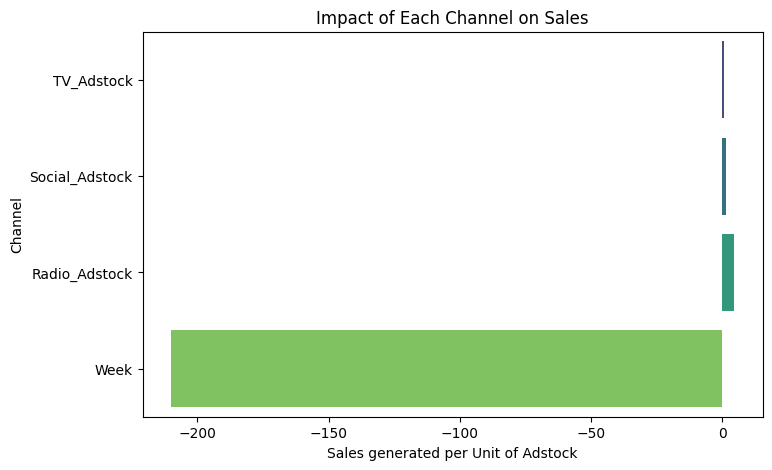

In [ ]:
# 8. Get the Coefficients (The Multipliers)
coef_data = pd.DataFrame({
    'Channel': features,
    'Coefficient': model.coef_
})

print("--- MARKETING ROI INSIGHTS ---")
print(coef_data)

# Visualizing the Importance
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Channel', data=coef_data, palette='viridis')
plt.title("Impact of Each Channel on Sales")
plt.xlabel("Sales generated per Unit of Adstock")
plt.show()

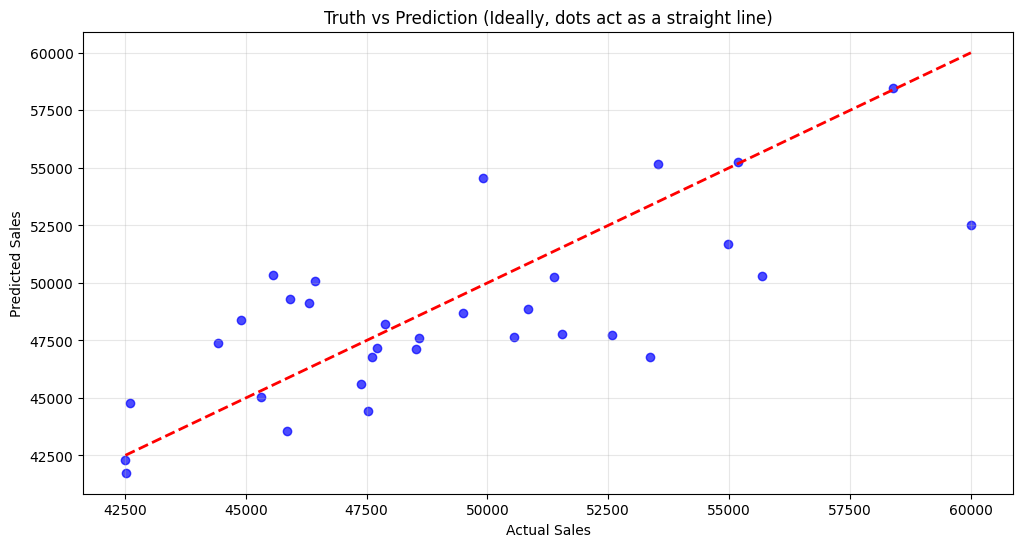

In [4]:
# 9. Visualize Predictions vs Actuals (on the Test Set)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, preds_test, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Perfect line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Truth vs Prediction (Ideally, dots act as a straight line)")
plt.grid(True, alpha=0.3)
plt.show()